In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [60]:
tf.__version__

'2.11.0'

In [61]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [62]:
x = np.array([-7,-4,-1,2,5,8,11,14])
y = np.array([3,6,9,12,15,18,21,24])

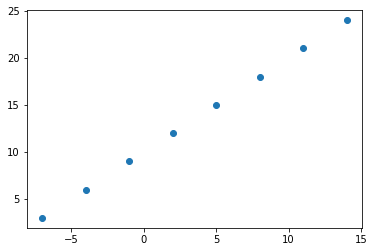

In [63]:
plt.scatter(x,y)

In [64]:
X = tf.constant(x)
Y = tf.constant(y)

**Direct Testing**

In [65]:
tf.random.set_seed(8)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics = ["mae"])

model.fit(tf.expand_dims(X, axis=-1),Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 557ms/step - loss: 14.9577 - mae: 14.9577
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 14.8252 - mae: 14.8252
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 14.6927 - mae: 14.6927
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 14.5602 - mae: 14.5602
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 14.4277 - mae: 14.4277


In [66]:
X,Y

(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [67]:
model.predict([17])

1/1 [==============================] - 0s 111ms/step


array([[-4.055295]], dtype=float32)

**Model Optimisation**

increasing number of iterations

In [68]:
tf.random.set_seed(8)

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))

model1.compile(loss = tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics = ["mae"])

model1.fit(tf.expand_dims(X, axis=-1),Y, epochs=50, verbose = 0)

In [69]:
X,Y

(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [70]:
model1.predict([17])

1/1 [==============================] - 0s 113ms/step


array([[29.5459]], dtype=float32)

In [71]:
tf.random.set_seed(8)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)
                            ])

model2.compile(loss = tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics = ["mae"])

model2.fit(tf.expand_dims(X, axis=-1),Y, epochs=50, verbose = 0)

In [72]:
X,Y

(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [73]:
model2.predict([20])

1/1 [==============================] - 0s 130ms/step


array([[37.430325]], dtype=float32)

In [74]:
tf.random.set_seed(8)

model3 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation=None),
                            tf.keras.layers.Dense(1)
                            ])

model3.compile(loss = tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
            metrics = ["mae"])

model3.fit(tf.expand_dims(X, axis=-1),Y, epochs=100, verbose = 0)

In [75]:
model3.predict([20])

1/1 [==============================] - 0s 122ms/step


array([[31.13403]], dtype=float32)

In [76]:
x = tf.range(-100, 100, 4)
y = x + 10

In [77]:
x,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [78]:
x.dtype

tf.int32

In [79]:
# from sklearn.model_selection import train_test_split

# x_train , x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)

In [80]:
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]
x_test, x_train, y_test, y_train

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

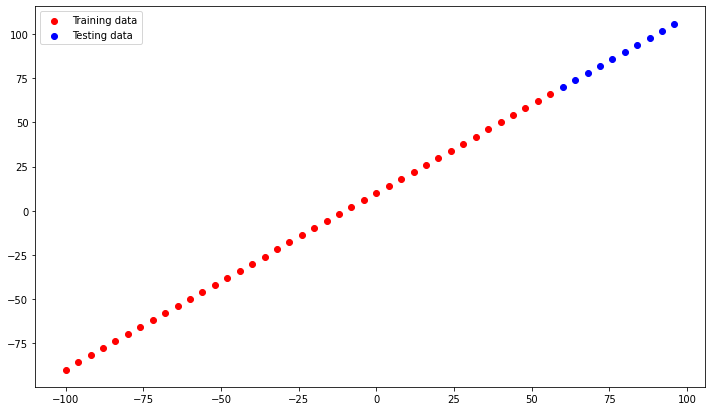

In [81]:
plt.figure(figsize=(12,7))
plt.scatter(x_train, y_train, c="r", label="Training data")
plt.scatter(x_test, y_test, c="b", label="Testing data")
plt.legend()


**Plottting model**

In [82]:
tf.random.set_seed(8)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "Input_layer"),
    tf.keras.layers.Dense(1, name = "Output_layer")
], name = "summary test")

model4.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [83]:
model4.summary()

Model: "summary test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


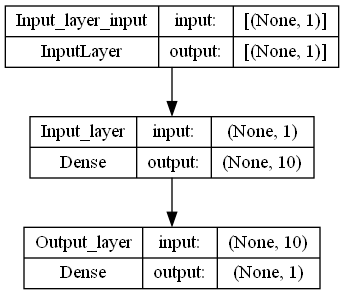

In [84]:
from tensorflow.keras.utils import plot_model

plot_model(model4, show_shapes=True)

In [85]:
tf.random.set_seed(8)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name = "Input_layer"),
], name = "Pred")

model5.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model5.fit(x_train, y_train, epochs = 100, verbose = 0)

In [86]:
y_pred = tf.constant(model5.predict(x_test))
y_pred, y_test

1/1 [==============================] - 0s 79ms/step


(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 66.00784 ],
        [ 70.319115],
        [ 74.63039 ],
        [ 78.94166 ],
        [ 83.25293 ],
        [ 87.5642  ],
        [ 91.87548 ],
        [ 96.18675 ],
        [100.498024],
        [104.809296]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

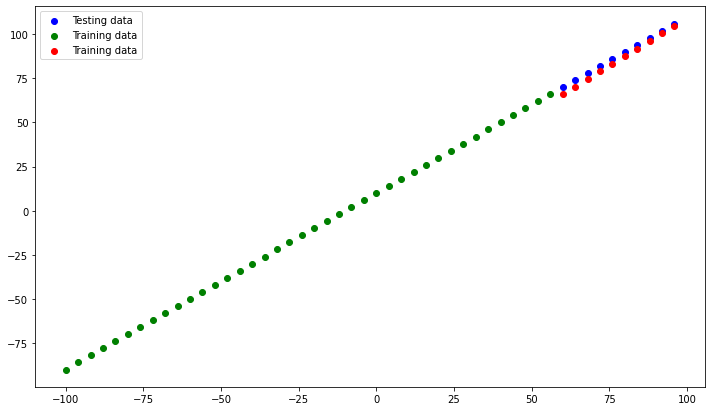

In [87]:
plt.figure(figsize=(12,7))

plt.scatter(x_test, y_test, c="b", label="Testing data")
plt.scatter(x_train, y_train, c="g", label="Training data")
plt.scatter(x_test, y_pred, c="r", label="Training data")


plt.legend()


In [88]:
model5.evaluate(x_test, y_test)

1/1 [==============================] - 0s 175ms/step - loss: 2.5914 - mae: 2.5914


[2.5914313793182373, 2.5914313793182373]

In [89]:
y_pred.shape, y_test.shape

(TensorShape([10, 1]), TensorShape([10]))

In [90]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21.992157, 17.744709, 14.421768, 12.023336, 10.549414, 10.      ,
       10.375096, 11.674701, 13.898814, 17.047436], dtype=float32)>

In [91]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))


def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))



In [92]:
def plot_info(test_data=x_test,train_data=x_train,test_labels=y_test,train_labels=y_train,prediction=y_pred):
    """plots the data"""
    plt.figure(figsize=(12,7))

    plt.scatter(test_data, test_labels, c="b", label="Testing data")
    plt.scatter(train_data, train_labels, c="g", label="Training data")
    plt.scatter(test_data, prediction, c="r", label="Training data")

    plt.legend()

In [93]:
tf.random.set_seed(8)

model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_01.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_01.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)



1/1 [==============================] - 0s 81ms/step


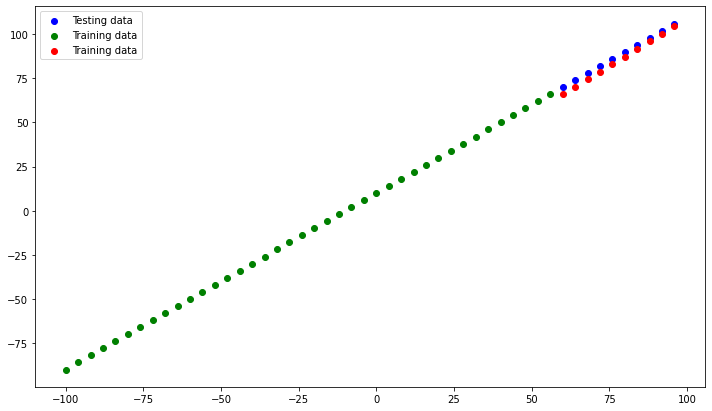

In [94]:
y_pred_01 = model_01.predict(x_test)

plot_info(prediction=y_pred_01)

In [95]:
tf.random.set_seed(8)

model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_02.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_02.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)



1/1 [==============================] - 0s 89ms/step


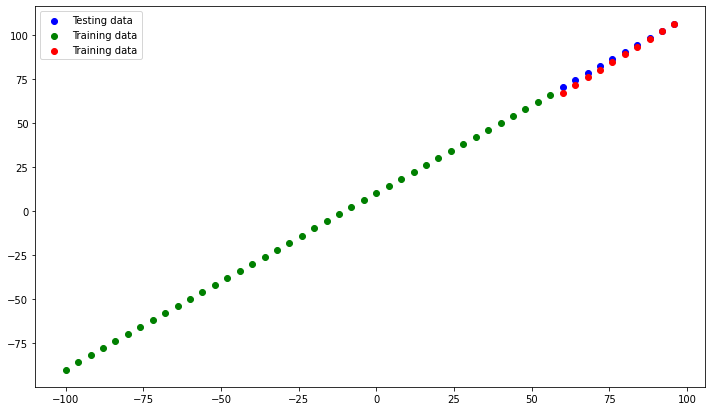

In [96]:
y_pred_02 = model_02.predict(x_test)

plot_info(prediction=y_pred_02)

In [98]:
mae_02 = mae(y_pred=y_pred_02, y_test=y_test)
mse_02 = mse(y_pred=y_pred_02, y_test=y_test)
mae_02, mse_02

(<tf.Tensor: shape=(), dtype=float32, numpy=1.4108353>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.9063566>)

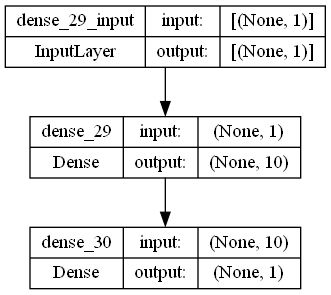

In [99]:
plot_model(model_02, show_shapes=True)

In [100]:
model_02.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                20        
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_02.save("reg-diff-4")

INFO:tensorflow:Assets written to: reg-diff-4\assets


INFO:tensorflow:Assets written to: reg-diff-4\assets


In [102]:
saved_loaded = tf.keras.models.load_model("reg-diff-4")

In [108]:
y_loaded = saved_loaded.predict(x_test)

1/1 [==============================] - 0s 52ms/step


In [110]:
y_loaded == y_pred_02

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])